# Triangulation Calculation


*(Note that in the mybinder demo, Latex expresions donlt render correctly and display a vertical line at the right hand edge of each expression.)*

![](images/Locate_Yourself_-_TM112_Block_2_Part_6_-_Google_Docs.png)

In [6]:
#We will make use of some maths expressions in this notebook
import math
from math import sin, cos
#Note that trigonometric functions are defined to use radians rather than degrees

If the bearing is 45 degrees, we have: $$180° = 90° + 45° + B$$

In [7]:
B=180-90-45
B

Similarly, if we measure the bearing from C to A to be 15 degrees West, the internal angle at A is 90 - 15 = 75 degrees.

In [8]:
A = 90 - 15
A

$$C = 180° - (A + B) = 180° - (75° + 45°) = 180° - 120° = 60°$$

In [9]:
C=180-(75+45)
C

A law known as The Law of Sines allows us to calculate the distances the points A and B from the third point.

$$ \frac{a}{sin A} = \frac{b}{sin B} =  \frac{c}{sin C}$$

So the length of side b going between points A and C can be calculated as:

$$ \frac{b}{sin B} = \frac{c}{sin C}$$

Inserting the numbers, we get:

$$ \frac{b}{sin 45°} = \frac{2704}{sin 60°}$$

Rearranging:

$$ b = sin 45° . \bigg(\frac{2704}{sin 60°}\bigg)$$

In [10]:
#In python we need to convert to radians to use trigonometric functions
b= sin(math.radians(45)) * (2704/sin(math.radians(60)))
b

Alternatively, can define a function to handle this for us automatically:

In [11]:
def sind(d):
    return sin(math.radians(d))

def cosd(d):
    return cos(math.radians(d))

In [12]:
b= sind(45) * (2704/sind(60))
b

In [13]:
#Calculate the co-ordinates of the unknown point
#Use the distance and the bearing to a point with known co-ordinates
#Remember your trigonometry: SOH, CAH, TOA
2704 - 3016 * sind(45), 2500 - 3016 * cosd(45)

In [14]:
#Check against the other known point:
0 - 2208 * sind(-15), 2500 - 2208 * cosd(15) 

In [ ]:
#Simple trigonometry also allows us to take into account situations where A and B do not have the same latitude
#Generally, the bearing measured clockwise from North from A to B takes the form
#tan(bearing) = xB - xA , yb - yA
#To ensure that the tangent function value is calculated correctly depending on the quadrant the offset point lies in
#the convention is to use to atan2 function (https://en.wikipedia.org/wiki/Atan2):
#bearing = atan2(xB - xA, yb - yA)

#Having calculated the bearing from A to B, this can be added in to the angle calculations

#Note that these approximations only work for a regular Cartesian co-ordinate system on a flat surface
#For actual latitude and longitude calculations, the cirvature of the Earth;s surface must be taken into account.
#See for example:
##http://www.igismap.com/formula-to-find-bearing-or-heading-angle-between-two-points-latitude-longitude/
##http://mathforum.org/library/drmath/view/55417.html
##http://williams.best.vwh.net/avform.htm#flat

We could add in generalised calculations here as a worked interactive example, perhaps with a graphical UI. See below for preliminary sketches.

In [15]:
#Ignore warnings raised by matplotlib
import warnings
warnings.filterwarnings("ignore")

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
def charter(a, b, c):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    plt.plot([a[0],b[0]],[a[1],b[1]],'x--',color='red')
    plt.plot([b[0],c[0]],[b[1],c[1]],'x--',color='green')
    plt.plot([a[0],c[0]],[a[1],c[1]],'x--',color='blue')
    
    xmin=min([a[0],b[0],c[0]])-1
    ymin=min([a[1],b[1],c[1]])-1
    xmax=max([a[0],b[0],c[0]])+1
    ymax=max([a[1],b[1],c[1]])+1
    
    ax.annotate('A',xy=a)
    ax.annotate('B',xy=b)
    ax.annotate('C',xy=c)
    
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    
    

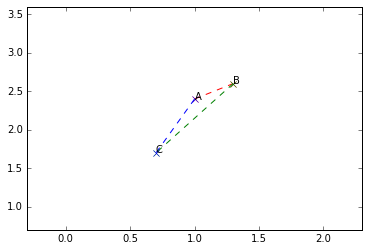

In [47]:
from ipywidgets import interact
def interactive_charter(xA=1.0,yA=1.0,xB=2.0,yB=2.0,xC=1.5,yC=1.1):
    charter((xA,yA),(xB,yB),(xC,yC))
    
    
interact(interactive_charter, xA=(0.0,4.0),yA=(0.0,4.0),xB=(0.0,4.0),yB=(0.0,4.0),xC=(0.0,4.0),yC=(0.0,4.0))

I wonder if we should have an interactive here where students can move the locations of A and B and specify a bearing to each from C, and display graphical working for the calculation, along with the co-ordinates of C. Learners could then try to do the actual calcuations themselves and check back against the diagram?

## Explorations of Worked Example using Sympy

Some notes on the extent to which we might be able to use `sympy` to work through maths examples.

With a notebook extension, we could also inline the rendered sympy - and the reseults of the calculations in the markdown cells.

In [19]:
#Import sympy packages
from sympy import *
#Set the notebook up for displaying maths notation - NOTE: Latex rendering buggy in the mybinder notebooks
from sympy import init_printing
init_printing()

a,b,c,A,B,C=symbols(['a','b','c','A','B','C'])

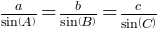

In [20]:
#The Sine Rule
exp=Eq(Eq(a/sin(A),b/sin(B)),c/sin(C))
exp

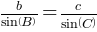

In [21]:
#For the simpler case, eg:
exp=Eq(b/sin(B),c/sin(C))
exp

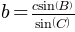

In [22]:
#We can solve for a:
Eq(b,solve(exp)[0][b])

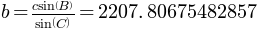

In [37]:
#Then we can substitute in values
distance=solve(exp)[0][b]
Eq(Eq(b,distance),distance.subs({c:2704,B:math.radians(45),C:math.radians(60)}))

In [31]:
#Find the location
#If the co-ords of A are x and y
xA,xB,xC,yA,yB,yC, dA, dB, hA, hB = symbols(['x_A','x_B','x_C','y_A','y_B','y_C','d_A','d_B', 'h_A','h_B'])
#dA - distance to A
#hA - bearing to A

In [38]:
_dA=distance.subs({c:2704,B:math.radians(45),C:math.radians(60)})
_hA=math.radians(-15)

In [39]:
#Find the x co-ordinate for C, relative to the distance from, and bearing to, A at (xA,yA):
xval=(xA - dA * sin(hA))
#Substitute in the distance and bearing to, and the x-co-ordinate of, A
Eq(Eq(xC,xval),xval.subs({dA:_dA,hA:_hA,xA:0}))

In [40]:
#Find the y co-ordinate for C, relative to the distance from, and bearing to, A at (xA,yA):
yval=(yA - dA * cos(hA))
#Substitute in the distance and bearing to, and the y-co-ordinate of, A
Eq(Eq(yC,yval),yval.subs({dA:_dA,hA:_hA,yA:2500}))